# Karata Clup Networks

In [48]:
#%matplotlib notebook

import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import numpy as np
import random

# Load the graph from the pickle file
G = nx.karate_club_graph()

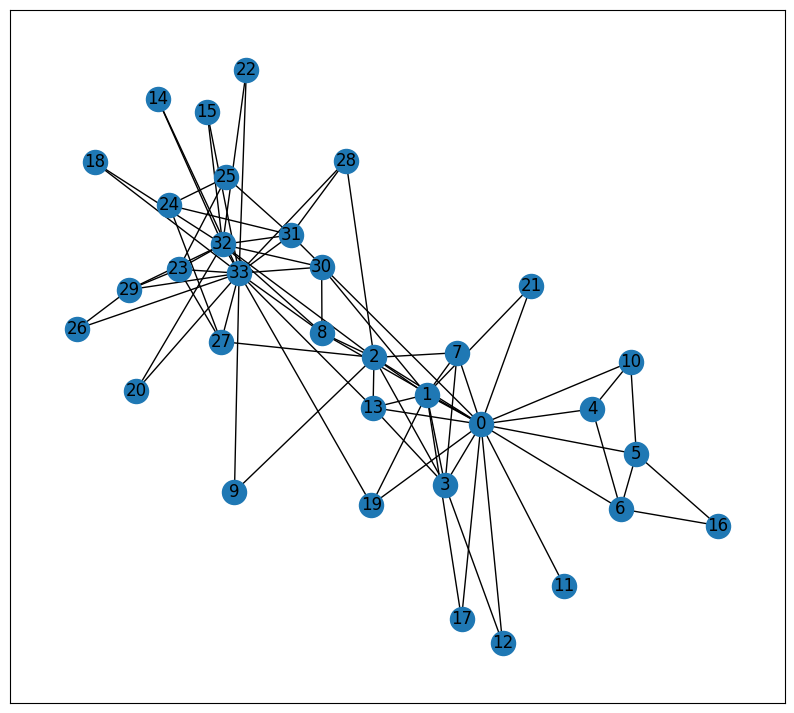

In [49]:
# draw the graph using the default spring layout
plt.figure(figsize=(10,9))
nx.draw_networkx(G)

In [50]:
# See what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

['bipartite_layout',
 'circular_layout',
 'forceatlas2_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout',
 'bfs_layout',
 'arf_layout']

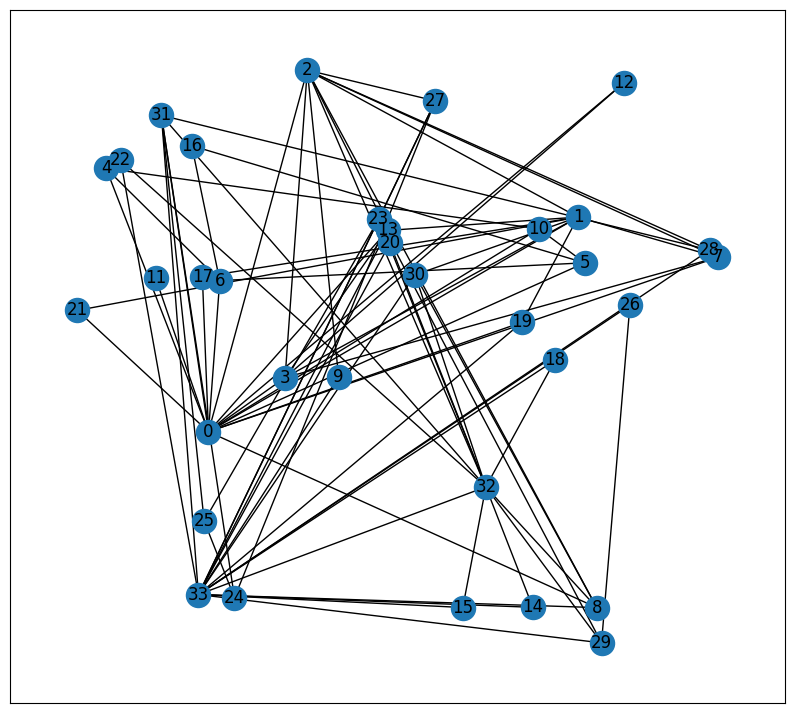

In [51]:
# Draw the graph using the random layout
plt.figure(figsize=(10,9))
pos = nx.random_layout(G)
nx.draw_networkx(G, pos)

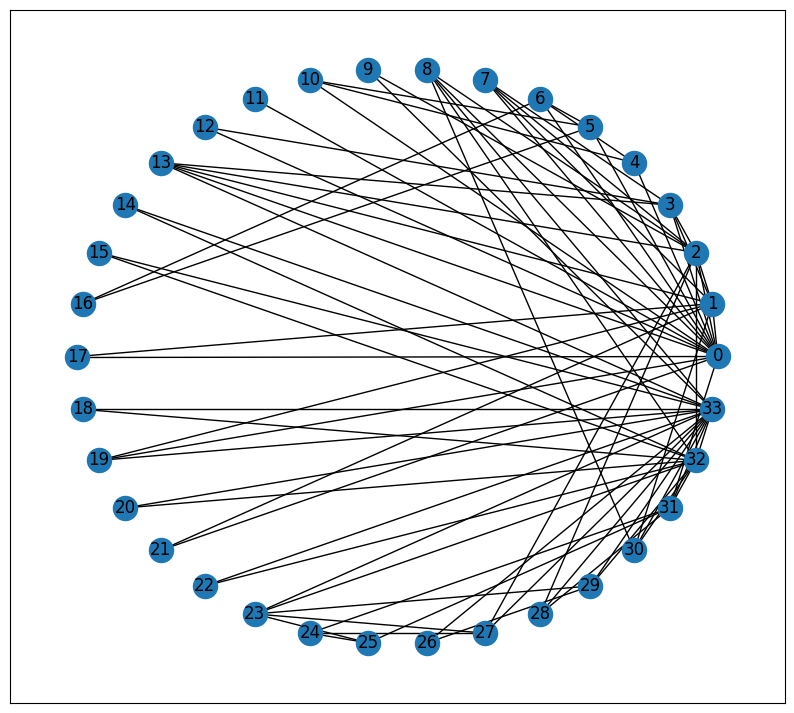

In [52]:
# Draw the graph using the circular layout
plt.figure(figsize=(10,9))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)

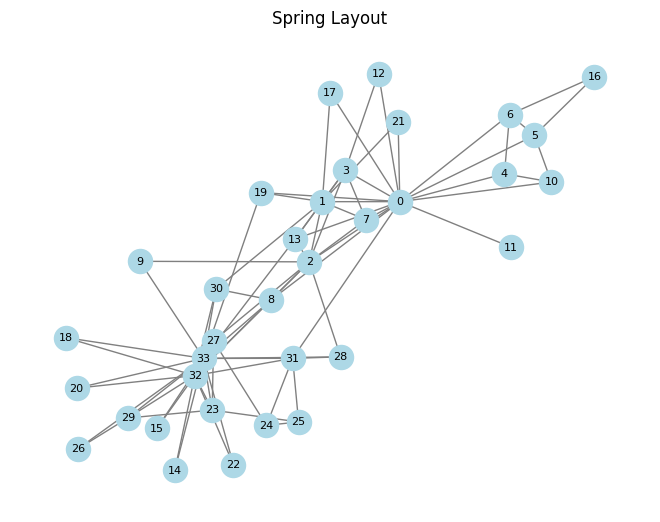

In [53]:
# Spring layout
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=8)
plt.title("Spring Layout")
plt.show()


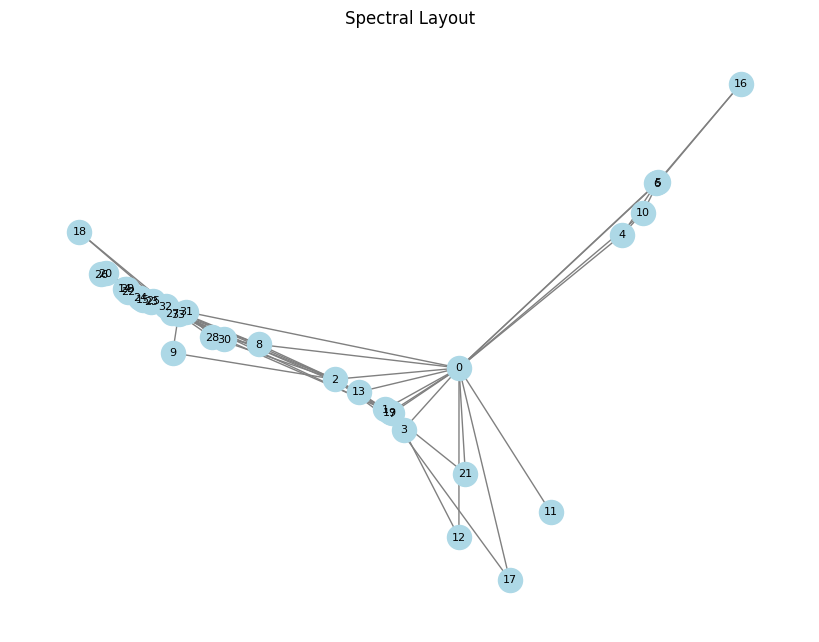

In [54]:
# Spectral layout
pos = nx.spectral_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=8)
plt.title("Spectral Layout")
plt.show()

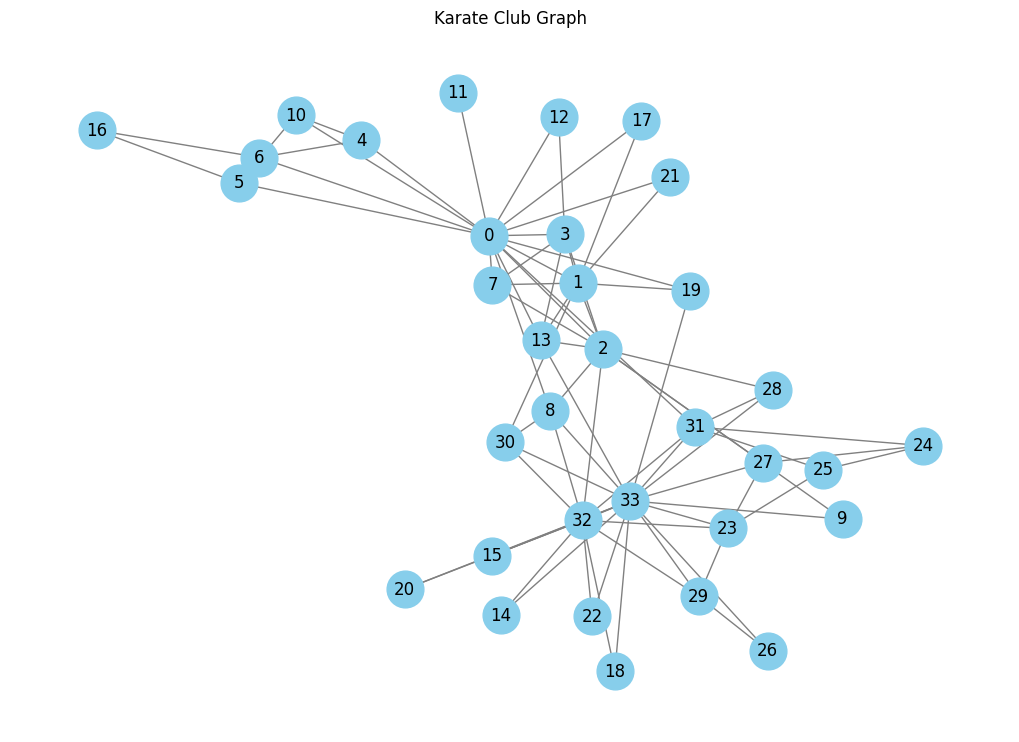

In [55]:
# Draw the graph
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title('Karate Club Graph')
plt.show()

In [56]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Define node colors and sizes based on centrality measures
node_color = [closeness_centrality[n] for n in G.nodes()]
node_size = [10000 * betweenness_centrality[n] for n in G.nodes()]

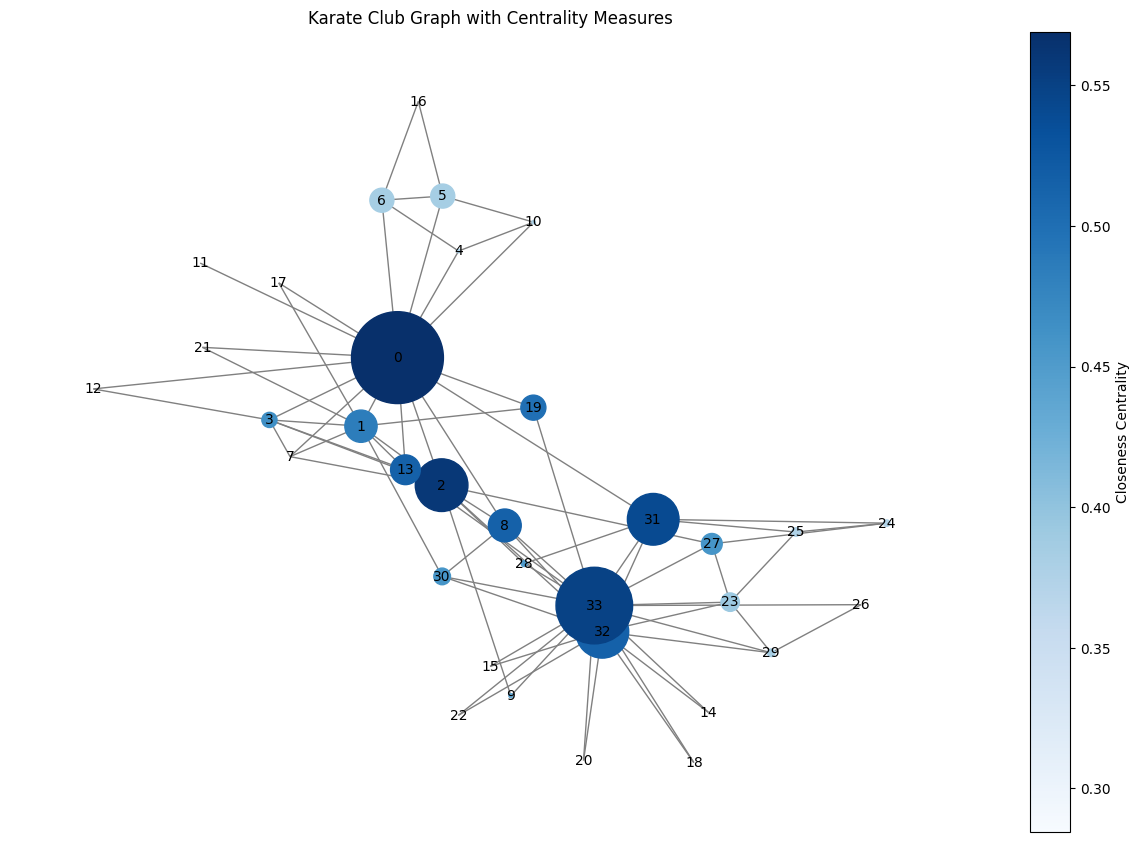

In [57]:
# Draw the graph with a spring layout
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Seed for reproducibility
nx.draw(G, pos, with_labels=True, node_color=node_color, node_size=node_size, cmap=plt.cm.Blues, edge_color='gray', font_size=10)
plt.title('Karate Club Graph with Centrality Measures')
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])
plt.colorbar(sm, label='Closeness Centrality', ax=plt.gca())
plt.show()

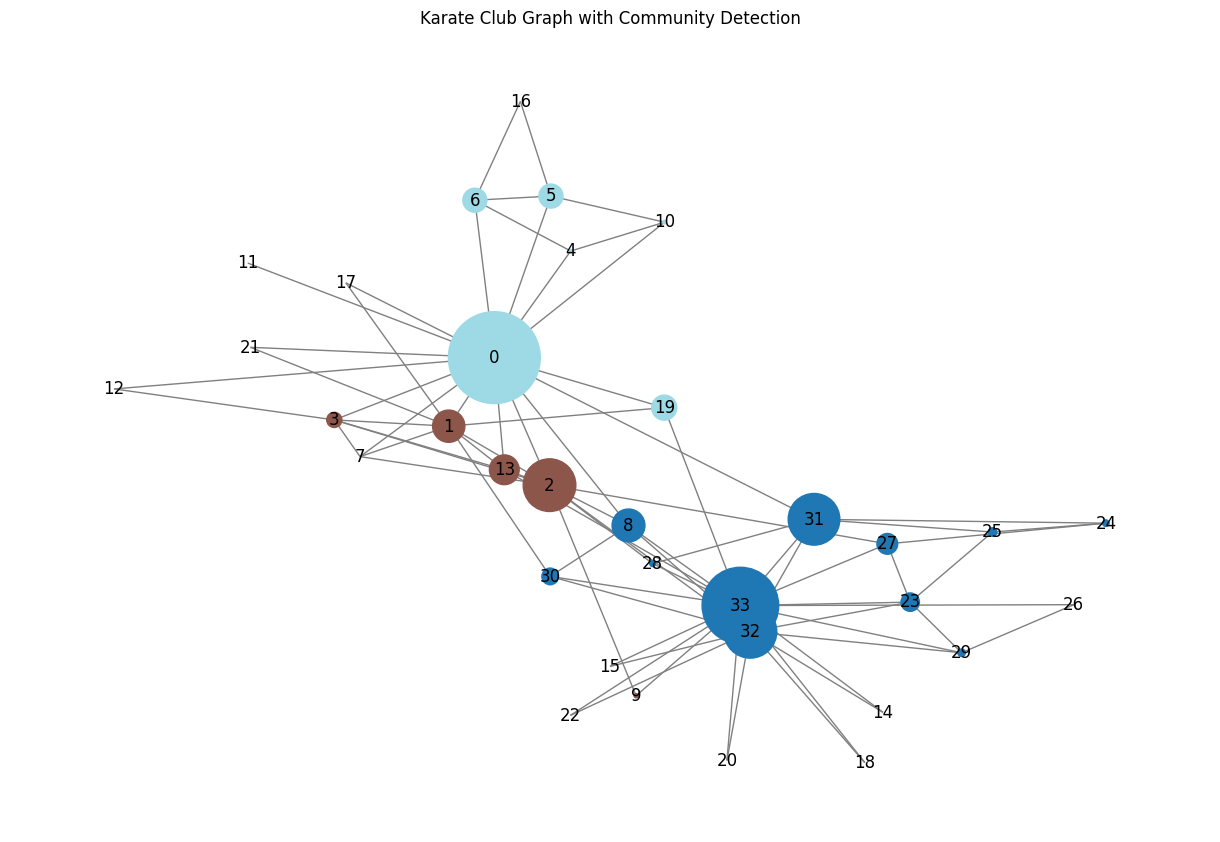

In [58]:
# Community detection
communities = community.greedy_modularity_communities(G)
community_map = {}
for i, community in enumerate(communities):
    for node in community:
        community_map[node] = i

# Draw the graph with community colors
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Seed for reproducibility
colors = [community_map[n] for n in G.nodes()]
nx.draw(G, pos, node_color=colors, node_size=node_size, cmap=plt.cm.tab20, with_labels=True, edge_color='gray')
plt.title('Karate Club Graph with Community Detection')
plt.show()

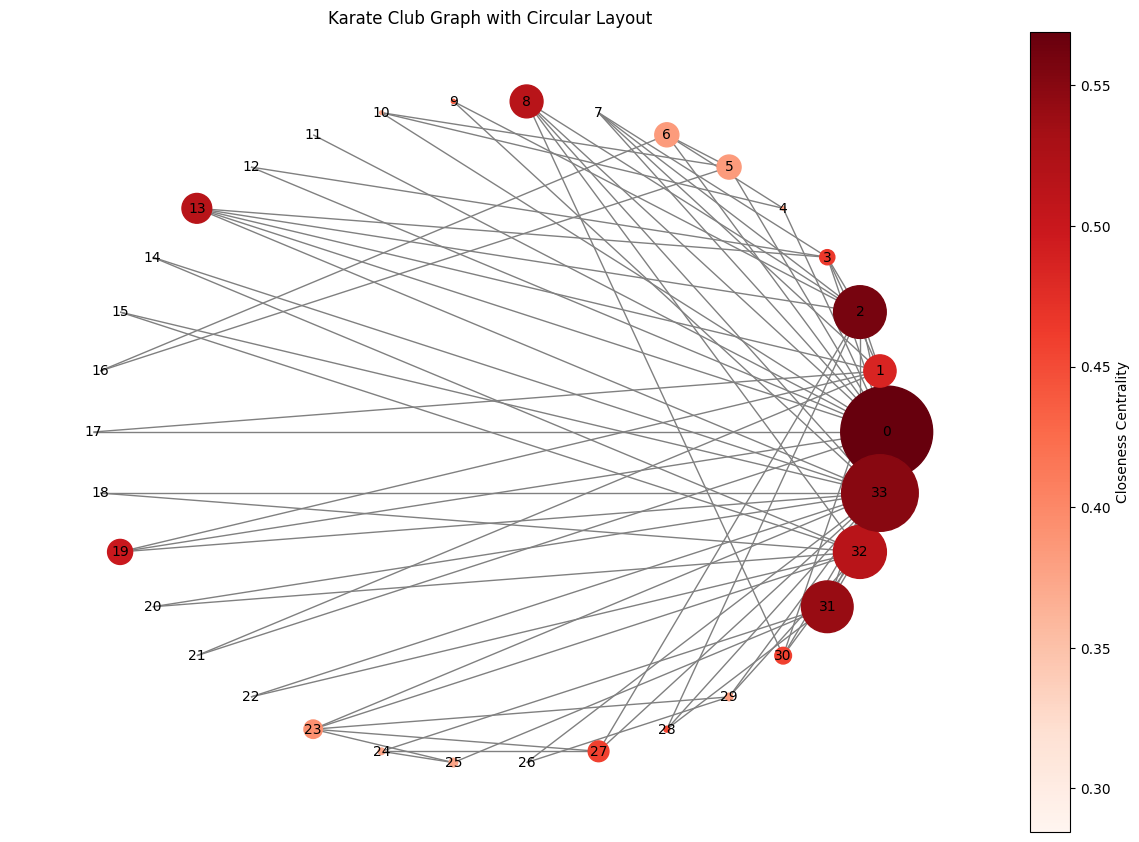

In [59]:
# Draw the graph with a circular layout
plt.figure(figsize=(12, 8))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color=node_color, node_size=node_size, cmap=plt.cm.Reds, edge_color='gray', font_size=10)
plt.title('Karate Club Graph with Circular Layout')
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])
plt.colorbar(sm, label='Closeness Centrality', ax=plt.gca())
plt.show()

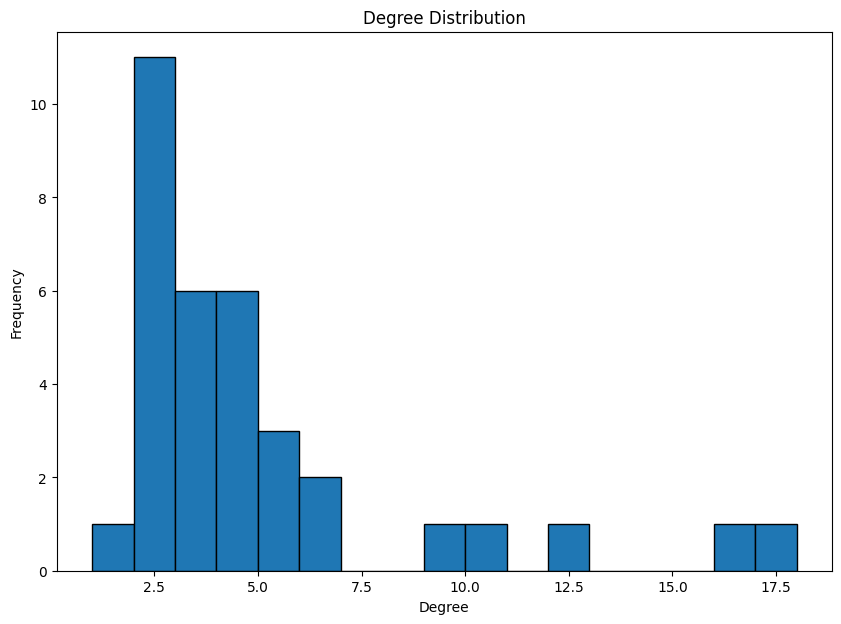

In [60]:
# Degree distribution
degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(10, 7))
plt.hist(degrees, bins=range(1, max(degrees)+2), edgecolor='black')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()


In [61]:
# Print centrality measures for the first 5 nodes
print("Degree Centrality:", list(degree_centrality.items())[:5])
print("Closeness Centrality:", list(closeness_centrality.items())[:5])
print("Betweenness Centrality:", list(betweenness_centrality.items())[:5])

Degree Centrality: [(0, 0.48484848484848486), (1, 0.2727272727272727), (2, 0.30303030303030304), (3, 0.18181818181818182), (4, 0.09090909090909091)]
Closeness Centrality: [(0, 0.5689655172413793), (1, 0.4852941176470588), (2, 0.559322033898305), (3, 0.4647887323943662), (4, 0.3793103448275862)]
Betweenness Centrality: [(0, 0.43763528138528146), (1, 0.053936688311688304), (2, 0.14365680615680618), (3, 0.011909271284271283), (4, 0.0006313131313131313)]


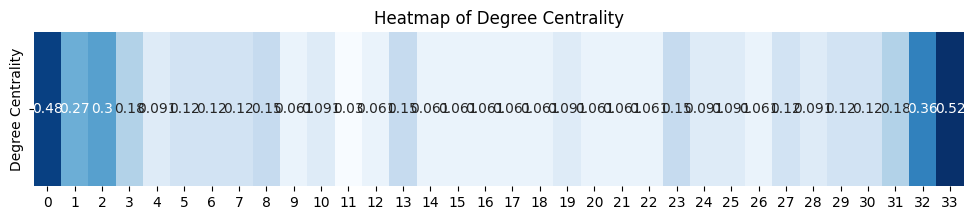

In [62]:
# Degree centrality heatmap
degree_values = np.array([degree_centrality[n] for n in G.nodes()])
degree_matrix = degree_values.reshape(1, -1)

plt.figure(figsize=(12, 2))
sns.heatmap(degree_matrix, annot=True, cmap='Blues', cbar=False, xticklabels=G.nodes(), yticklabels=['Degree Centrality'])
plt.title('Heatmap of Degree Centrality')
plt.show()


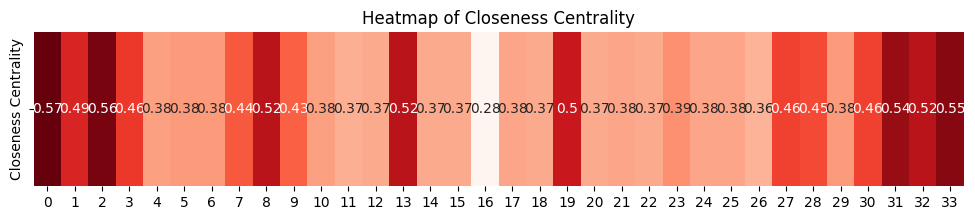

In [63]:
# Closeness centrality heatmap
closeness_values = np.array([closeness_centrality[n] for n in G.nodes()])
closeness_matrix = closeness_values.reshape(1, -1)

plt.figure(figsize=(12, 2))
sns.heatmap(closeness_matrix, annot=True, cmap='Reds', cbar=False, xticklabels=G.nodes(), yticklabels=['Closeness Centrality'])
plt.title('Heatmap of Closeness Centrality')
plt.show()


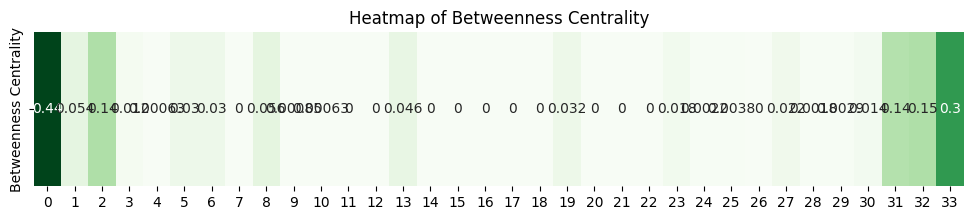

In [64]:
# Betweenness centrality heatmap
betweenness_values = np.array([betweenness_centrality[n] for n in G.nodes()])
betweenness_matrix = betweenness_values.reshape(1, -1)

plt.figure(figsize=(12, 2))
sns.heatmap(betweenness_matrix, annot=True, cmap='Greens', cbar=False, xticklabels=G.nodes(), yticklabels=['Betweenness Centrality'])
plt.title('Heatmap of Betweenness Centrality')
plt.show()

In [65]:
node_degree = dict(G.degree())
print("Node Degree:", node_degree)

Node Degree: {0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17}


In [66]:
average_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
print("Average Degree:", average_degree)

Average Degree: 4.588235294117647


In [67]:
complete_graph = nx.complete_graph(5)
star_graph = nx.star_graph(4)

print("Complete Graph Edges:", complete_graph.edges())
print("Star Graph Edges:", star_graph.edges())


Complete Graph Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
Star Graph Edges: [(0, 1), (0, 2), (0, 3), (0, 4)]


In [68]:
is_connected = nx.is_connected(G)
print("Is the Karate Club Graph connected?", is_connected)

Is the Karate Club Graph connected? True


In [69]:
adj_matrix = nx.adjacency_matrix(G).todense()
print("Adjacency Matrix:\n", adj_matrix)

Adjacency Matrix:
 [[0 4 5 ... 2 0 0]
 [4 0 6 ... 0 0 0]
 [5 6 0 ... 0 2 0]
 ...
 [2 0 0 ... 0 4 4]
 [0 0 2 ... 4 0 5]
 [0 0 0 ... 4 5 0]]


In [70]:
edge_list = list(G.edges(data=True))
adj_list = {n: list(G.neighbors(n)) for n in G.nodes()}
print("Edge List:", edge_list)
print("Adjacent List:", adj_list)

Edge List: [(0, 1, {'weight': 4}), (0, 2, {'weight': 5}), (0, 3, {'weight': 3}), (0, 4, {'weight': 3}), (0, 5, {'weight': 3}), (0, 6, {'weight': 3}), (0, 7, {'weight': 2}), (0, 8, {'weight': 2}), (0, 10, {'weight': 2}), (0, 11, {'weight': 3}), (0, 12, {'weight': 1}), (0, 13, {'weight': 3}), (0, 17, {'weight': 2}), (0, 19, {'weight': 2}), (0, 21, {'weight': 2}), (0, 31, {'weight': 2}), (1, 2, {'weight': 6}), (1, 3, {'weight': 3}), (1, 7, {'weight': 4}), (1, 13, {'weight': 5}), (1, 17, {'weight': 1}), (1, 19, {'weight': 2}), (1, 21, {'weight': 2}), (1, 30, {'weight': 2}), (2, 3, {'weight': 3}), (2, 7, {'weight': 4}), (2, 8, {'weight': 5}), (2, 9, {'weight': 1}), (2, 13, {'weight': 3}), (2, 27, {'weight': 2}), (2, 28, {'weight': 2}), (2, 32, {'weight': 2}), (3, 7, {'weight': 3}), (3, 12, {'weight': 3}), (3, 13, {'weight': 3}), (4, 6, {'weight': 2}), (4, 10, {'weight': 3}), (5, 6, {'weight': 5}), (5, 10, {'weight': 3}), (5, 16, {'weight': 3}), (6, 16, {'weight': 3}), (8, 30, {'weight': 3})

In [71]:
clustering_coefficient = nx.clustering(G)
average_clustering_coefficient = nx.average_clustering(G)
print("Clustering Coefficient:", clustering_coefficient)
print("Average Clustering Coefficient:", average_clustering_coefficient)

Clustering Coefficient: {0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0, 10: 0.6666666666666666, 11: 0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882}
Average Clustering Coefficient: 0.5706384782076823


In [72]:
print("Degree Centrality:", degree_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Betweenness Centrality:", betweenness_centrality)

Degree Centrality: {0: 0.48484848484848486, 1: 0.2727272727272727, 2: 0.30303030303030304, 3: 0.18181818181818182, 4: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.15151515151515152, 9: 0.06060606060606061, 10: 0.09090909090909091, 11: 0.030303030303030304, 12: 0.06060606060606061, 13: 0.15151515151515152, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.09090909090909091, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.15151515151515152, 24: 0.09090909090909091, 25: 0.09090909090909091, 26: 0.06060606060606061, 27: 0.12121212121212122, 28: 0.09090909090909091, 29: 0.12121212121212122, 30: 0.12121212121212122, 31: 0.18181818181818182, 32: 0.36363636363636365, 33: 0.5151515151515151}
Closeness Centrality: {0: 0.5689655172413793, 1: 0.4852941176470588, 2: 0.559322033898305, 3: 0.4647887323943662, 4: 0.3793103448275862, 5: 0

In [73]:
DG = nx.DiGraph(G)

In [74]:
# Randomly assign directions to edges
for u, v in G.edges():
    if random.choice([True, False]):  # Randomly decide direction
        DG.remove_edge(u, v)  # Keep the edge direction as u -> v
    else:
        DG.remove_edge(v, u)  # Reverse the edge direction to v ->

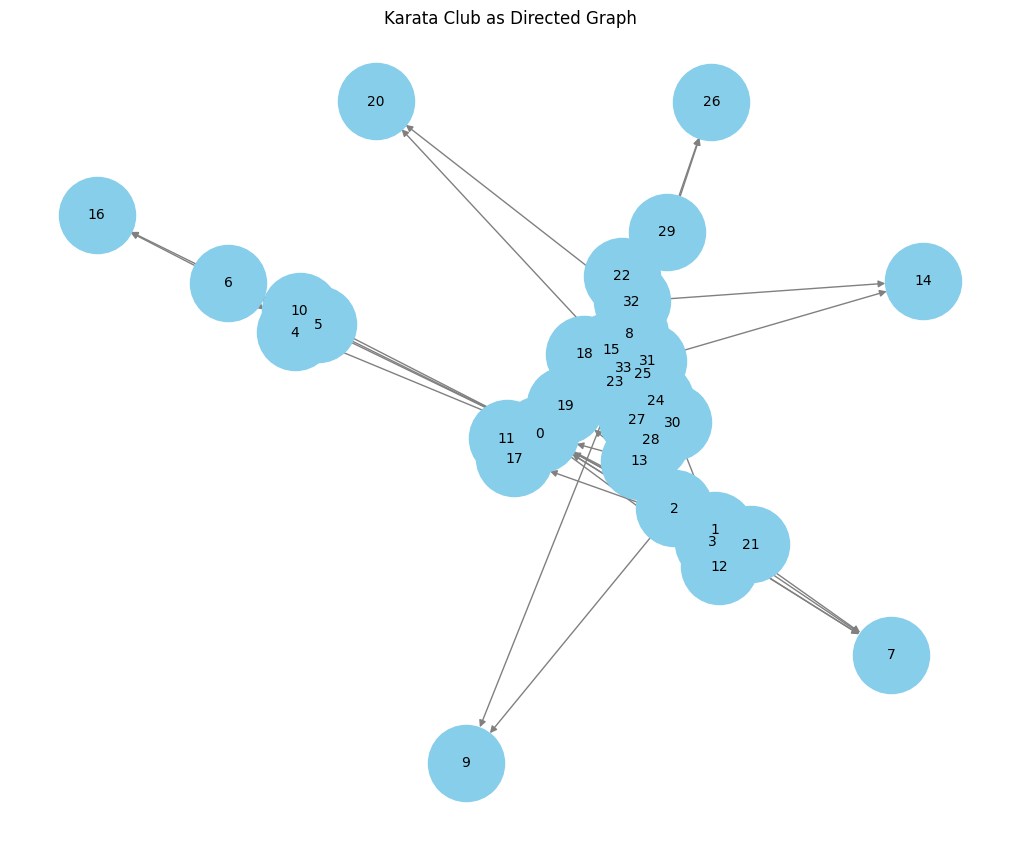

In [75]:
pos = nx.spring_layout(DG)  
# Draw the directed graph
plt.figure(figsize=(10, 8))
nx.draw(
    DG,
    pos,
    with_labels=True,
    node_color="skyblue",
    edge_color="gray",
    node_size=3000,
    arrows=True,
    font_size=10
)
plt.title("Karata Club as Directed Graph")
plt.show()

In [76]:
# Calculate centrality measures
in_degree = dict(DG.in_degree())
out_degree = dict(DG.out_degree())
closeness_centrality = nx.closeness_centrality(DG)
betweenness_centrality = nx.betweenness_centrality(DG)
degree_centrality = nx.degree_centrality(DG)

# Display results
print("In-Degree:", in_degree)
print("Out-Degree:", out_degree)
print("Closeness Centrality:", closeness_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Degree Centrality:", degree_centrality)

In-Degree: {0: 7, 1: 4, 2: 6, 3: 2, 4: 2, 5: 2, 6: 1, 7: 4, 8: 3, 9: 2, 10: 2, 11: 0, 12: 1, 13: 1, 14: 2, 15: 1, 16: 2, 17: 1, 18: 1, 19: 1, 20: 2, 21: 1, 22: 1, 23: 4, 24: 1, 25: 1, 26: 2, 27: 1, 28: 1, 29: 2, 30: 2, 31: 3, 32: 3, 33: 9}
Out-Degree: {0: 9, 1: 5, 2: 4, 3: 4, 4: 1, 5: 2, 6: 3, 7: 0, 8: 2, 9: 0, 10: 1, 11: 1, 12: 1, 13: 4, 14: 0, 15: 1, 16: 0, 17: 1, 18: 1, 19: 2, 20: 0, 21: 1, 22: 1, 23: 1, 24: 2, 25: 2, 26: 0, 27: 3, 28: 2, 29: 2, 30: 2, 31: 3, 32: 9, 33: 8}
Closeness Centrality: {0: 0.3111395646606914, 1: 0.32486631016042783, 2: 0.31558441558441563, 3: 0.2144748455428067, 4: 0.23753665689149564, 5: 0.19209486166007908, 6: 0.23011363636363638, 7: 0.32996632996632996, 8: 0.32971506105834464, 9: 0.300728807057921, 10: 0.24011857707509884, 11: 0.0, 12: 0.23011363636363638, 13: 0.23753665689149564, 14: 0.2828282828282828, 15: 0.21872187218721875, 16: 0.20133538777606574, 17: 0.23753665689149564, 18: 0.21872187218721875, 19: 0.23753665689149564, 20: 0.2828282828282828, 21:

In [77]:
# Apply the PageRank algorithm
pagerank_scores = nx.pagerank(DG, alpha=0.85)  # alpha is the damping factor

In [78]:
# Display PageRank scores in a tabular format
print("PageRank Scores:")
print(f"{'Node':<10}{'PageRank Score':<15}")
print("-" * 25)

for node, score in sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{node:<10}{score:.4f}")

PageRank Scores:
Node      PageRank Score 
-------------------------
33        0.1115
0         0.0718
32        0.0612
1         0.0469
2         0.0446
5         0.0425
8         0.0417
31        0.0414
7         0.0380
23        0.0378
10        0.0314
16        0.0310
26        0.0309
30        0.0288
29        0.0257
14        0.0239
22        0.0235
3         0.0224
9         0.0210
4         0.0201
13        0.0196
20        0.0189
27        0.0173
24        0.0173
28        0.0173
6         0.0172
25        0.0144
21        0.0143
15        0.0139
19        0.0129
12        0.0114
17        0.0107
18        0.0103
11        0.0085


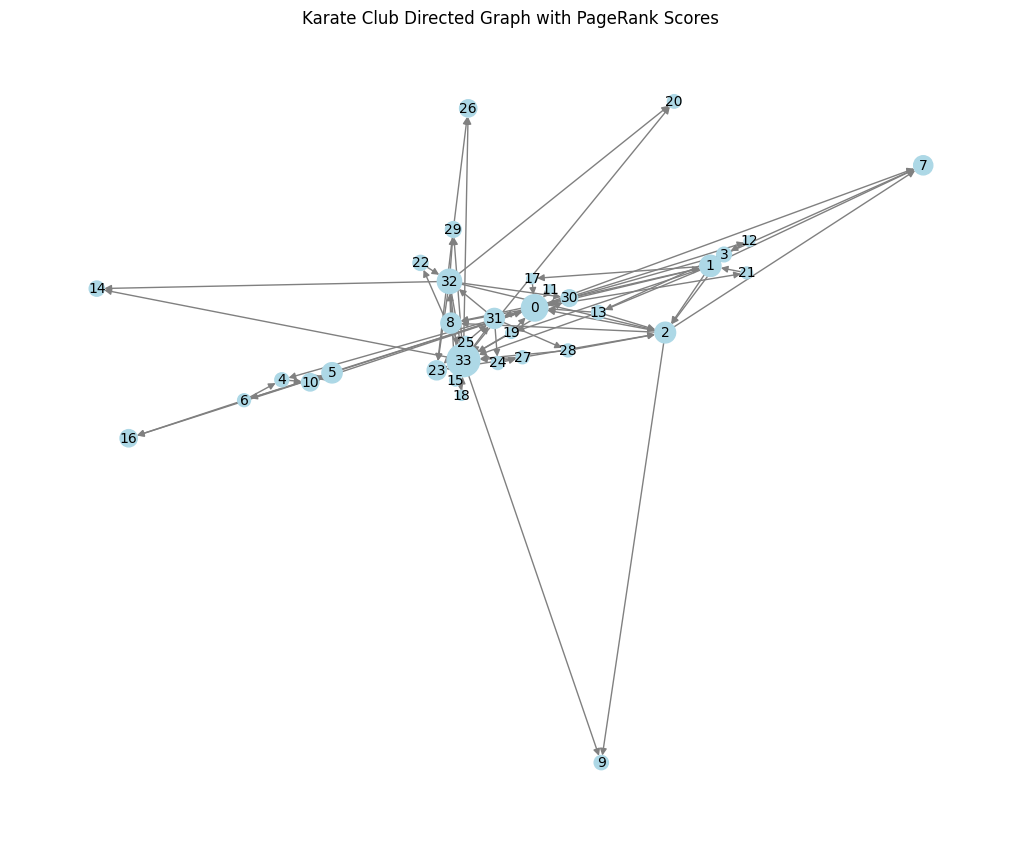

In [79]:
# Visualize the graph with node sizes proportional to PageRank scores
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(DG)  
node_sizes = [pagerank_scores[node] * 5000 for node in DG.nodes]  
nx.draw(
    DG,
    pos,
    with_labels=True,
    node_color="lightblue",
    edge_color="gray",
    node_size=node_sizes,
    arrows=True,
    font_size=10
)
plt.title("Karate Club Directed Graph with PageRank Scores")
plt.show()

In [80]:
# Apply the HITS algorithm
hubs, authorities = nx.hits(DG, max_iter=100, tol=1e-6)  # max_iter and tol ensure convergence

In [81]:
# Display Hubs Scores in a table format
print(f"{'Rank':<5}{'Node':<10}{'Hub Score':<15}")
print("-" * 30)
for rank, (node, score) in enumerate(sorted(hubs.items(), key=lambda x: x[1], reverse=True), 1):
    print(f"{rank:<5}{node:<10}{score:<15.4f}")

print("\n" + "-" * 30)

Rank Node      Hub Score      
------------------------------
1    32        0.1830         
2    27        0.1023         
3    25        0.0791         
4    13        0.0739         
5    1         0.0709         
6    33        0.0549         
7    8         0.0512         
8    3         0.0487         
9    15        0.0484         
10   23        0.0484         
11   2         0.0403         
12   28        0.0395         
13   29        0.0342         
14   0         0.0289         
15   18        0.0242         
16   19        0.0194         
17   5         0.0116         
18   11        0.0110         
19   30        0.0075         
20   17        0.0073         
21   31        0.0038         
22   12        0.0037         
23   21        0.0030         
24   6         0.0019         
25   22        0.0018         
26   4         0.0010         
27   10        0.0002         
28   24        0.0000         
29   7         -0.0000        
30   9         -0.0000        
31   14 

In [82]:
# Display Authorities Scores in a table format
print(f"{'Rank':<5}{'Node':<10}{'Authority Score':<15}")
print("-" * 30)
for rank, (node, score) in enumerate(sorted(authorities.items(), key=lambda x: x[1], reverse=True), 1):
    print(f"{rank:<5}{node:<10}{score:<15.4f}")


Rank Node      Authority Score
------------------------------
1    33        0.1661         
2    23        0.1325         
3    2         0.1049         
4    29        0.0612         
5    31        0.0604         
6    30        0.0519         
7    0         0.0502         
8    14        0.0479         
9    7         0.0471         
10   20        0.0439         
11   15        0.0399         
12   13        0.0258         
13   1         0.0205         
14   8         0.0205         
15   26        0.0179         
16   3         0.0169         
17   18        0.0133         
18   32        0.0125         
19   22        0.0120         
20   9         0.0109         
21   19        0.0103         
22   4         0.0066         
23   6         0.0063         
24   17        0.0052         
25   10        0.0044         
26   21        0.0042         
27   16        0.0029         
28   12        0.0021         
29   5         0.0007         
30   24        0.0006         
31   28 

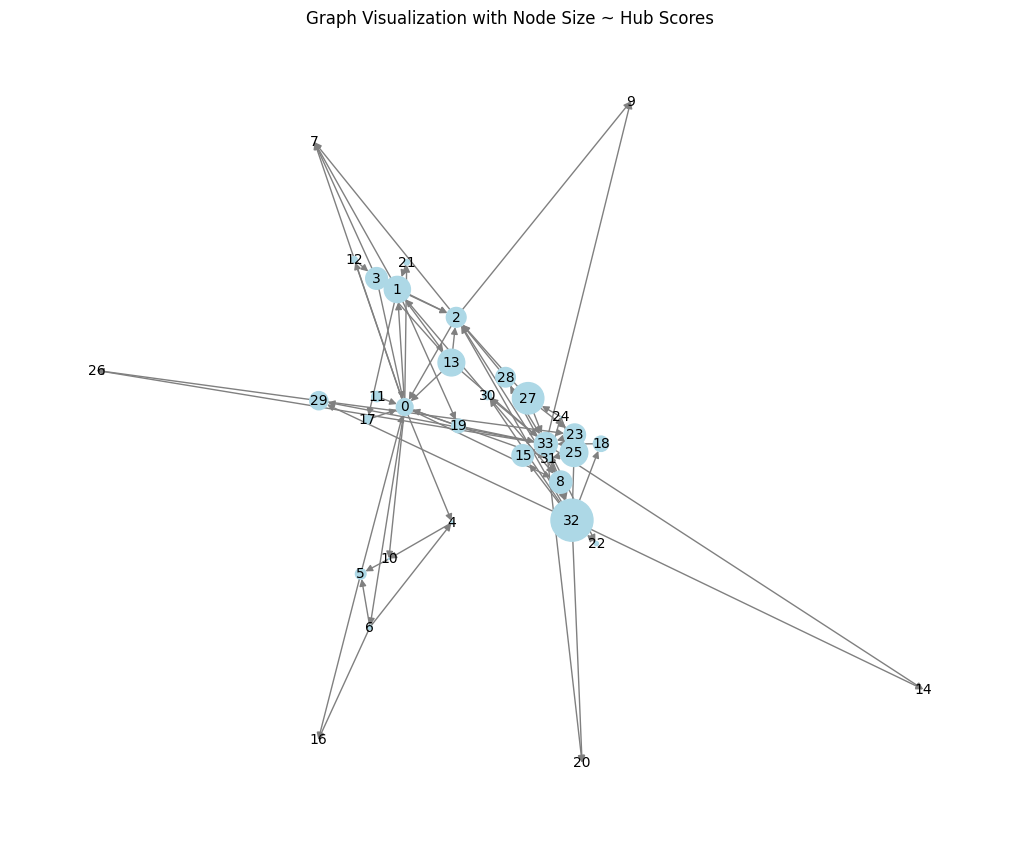

In [83]:
# Visualize the graph with node sizes proportional to hub scores
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(DG)

# Node size for hubs and authorities
hub_sizes = [hubs[node] * 5000 for node in DG.nodes]
auth_sizes = [authorities[node] * 5000 for node in DG.nodes]

# Draw the graph
nx.draw(
    DG,
    pos,
    with_labels=True,
    node_color='lightblue',
    edge_color='gray',
    node_size=hub_sizes,
    arrows=True,
    font_size=10
)
plt.title("Graph Visualization with Node Size ~ Hub Scores")
plt.show()

/var/data/python/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/var/data/python/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:707: RuntimeWarning: invalid value encountered in sqrt
  return self.np.sqrt(marker_size) / 2


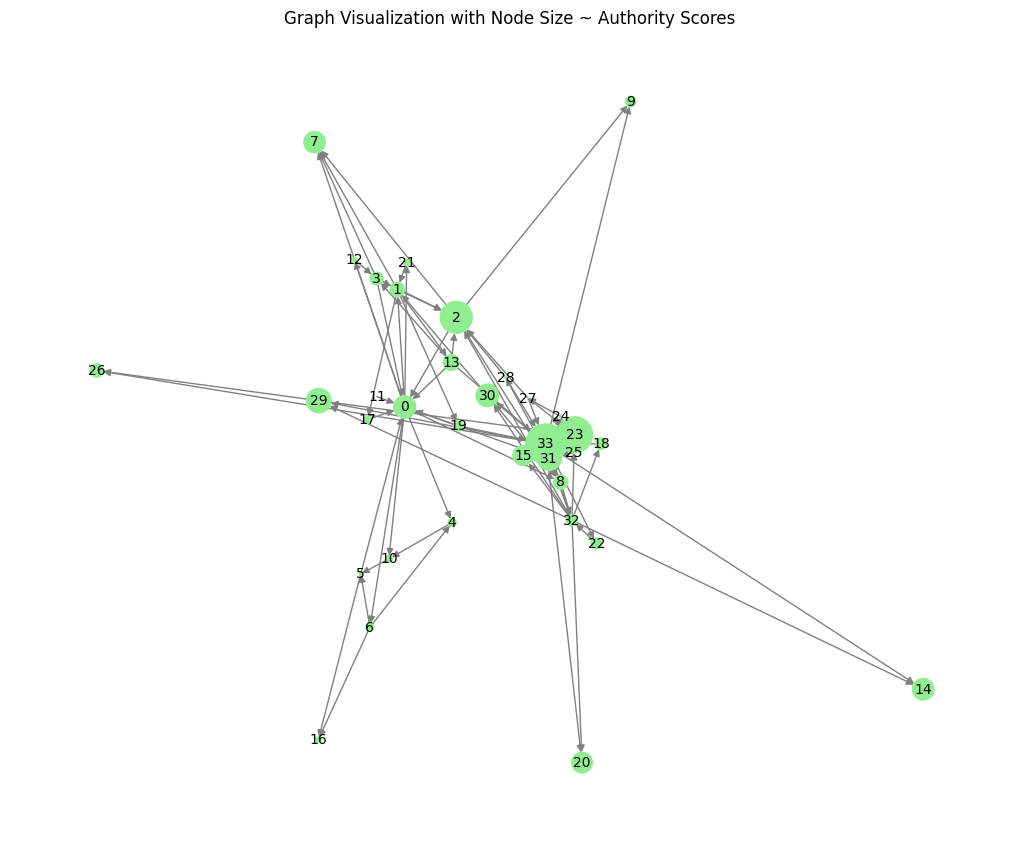

In [84]:
# Visualize authority scores (optional)
plt.figure(figsize=(10, 8))
nx.draw(
    DG,
    pos,
    with_labels=True,
    node_color='lightgreen',
    edge_color='gray',
    node_size=auth_sizes,
    arrows=True,
    font_size=10
)
plt.title("Graph Visualization with Node Size ~ Authority Scores")
plt.show()

## Conclusion

In this analysis, we explored various aspects of the Karate Club graph using NetworkX and Matplotlib. We covered the following key points:

1. **Node Degree and Average Degree**:
   - We calculated the degree of each node and the average degree of the graph, providing insights into the connectivity of the network.

2. **Special Graphs**:
   - We examined examples of special graphs, such as complete graphs and star graphs, to understand different network structures.

3. **Connectivity of Graphs**:
   - We verified that the Karate Club graph is connected, ensuring that there is a path between any pair of nodes.

4. **Matrix Representation**:
   - We represented the graph using an adjacency matrix, which is useful for various matrix-based computations.

5. **Graph Representation**:
   - We provided both edge list and adjacency list representations of the graph, highlighting different ways to store and manipulate graph data.

6. **Quantifying Social Structure**:
   - We calculated the clustering coefficient and average clustering coefficient to quantify the tendency of nodes to cluster together.

7. **Centrality Measures**:
   - We computed various centrality measures, including degree centrality, closeness centrality, betweenness centrality, and eigenvector centrality, to identify the most important nodes in the network.

8. **Visualizations**:
   - We enhanced the graph visualization by varying edges based on weight and creating heatmaps to show the distribution of node attributes.

These analyses and visualizations provide a comprehensive understanding of the structure and properties of the Karate Club graph. By leveraging these techniques, we can gain valuable insights into the dynamics of social networks and other complex systems.

Feel free to explore further and apply these methods to other datasets to uncover more interesting patterns and relationships!

---

*This analysis was conducted using Python libraries NetworkX and Matplotlib. The code and visualizations can be easily adapted for other types of graphs and networks.*
